In [ ]:
import numpy as np
from scipy import signal as sg
from scipy import misc
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [ ]:
# Convolution with numpy
x = [3 ,4, 5]
h = [2, 1, 0]
y = np.convolve(x, h)
print(y)

In [ ]:
x = [6, 2]
h = [1, 2, 5, 4]
y = np.convolve(x, h)
print(y)
y = np.convolve(x, h,"full") # zero padding
print(y)
y = np.convolve(x, h,"valid")
print(y)

In [ ]:
# Convolution with scipy
I = [[255, 7, 3],
     [212, 240, 4],
     [218, 216, 230]]
g = [[-1, 1]]
y = sg.convolve(I, g, "valid")
print("Without zero padding \n")
print("{0} \n".format(y))
y = sg.convolve(I, g)
print("With zero padding \n")
print("{0} \n".format(y))

In [ ]:
# Convolution with TF
input_ = tf.Variable(tf.random_normal([1,10,10,1]))
filter_ = tf.Variable(tf.random_normal([3,3,1,1]))

op = tf.nn.conv2d(input_,filter_, strides=[1,1,1,1], padding='VALID')
op2 = tf.nn.conv2d(input_,filter_, strides=[1,1,1,1], padding='SAME')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Input \n")
    print("{0} \n".format(input_.eval()))
    print("Filter \n")
    print("{0} \n".format(filter_.eval()))
    result = sess.run(op)
    print("Result/Feature map with valid positions \n")
    print(result)
    print("\n")
    result = sess.run(op2)
    print("Result/Feature map with padding \n")
    print(result)

(768, 1024)


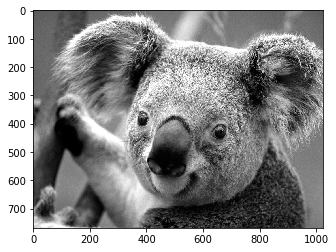

In [8]:
img = Image.open("Koala.jpg")
img_gray = img.convert("L")
arr = np.asarray(img_gray)
print(arr.shape)

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')
plt.show(imgplot)

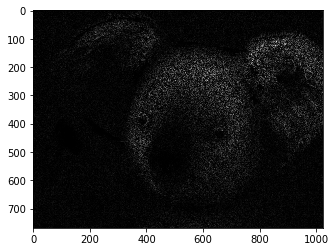

In [15]:
kernel = np.array([ [0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0] ])
grad = sg.convolve2d(arr, kernel, mode='same', boundary='symm')

imgplot = plt.imshow(np.absolute(grad))
imgplot.set_cmap('gray')
plt.show(imgplot)

Gradient magnitude - Feature map


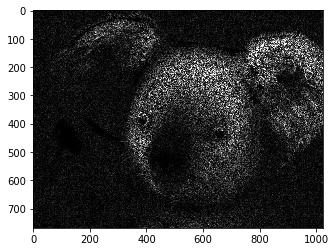

In [19]:
grad_biases = np.absolute(grad) + 100
grad_biases[grad_biases > 255] = 255

print("Gradient magnitude - Feature map")
imgplot = plt.imshow(np.absolute(grad_biases))
imgplot.set_cmap('gray')
plt.show(imgplot)